# Diffraction

**General objective:** 
of this module is to provide students with a comprehensive understanding of diffraction. Through theoretical explanations, simulations, and practical examples, students will develop a clear grasp of diffraction and its significance in various fields of science and technology, with a particular focus on electron diffraction.

## 1. Introduction

<u>Objective:</u> To provide a foundational understanding of diffraction, its historical development, and its fundamental principles.

**Diffraction** is the phenomenon when waves bend around obstacles or propagating through narrow openings, changing direction and deviating from geometric optics predictions.

- It is a universal wave phenomenon and is characterized by the same laws when observing wave fields of different natures.


- Diffraction is related with the phenomenon of interference, which is formulated in *The Huygens–Fresnel principle* - the main postulate of wave theory, describing and explaining the mechanism of wave propagation.

---
```
Every point on a wave front is itself the source of spherical wavelets, and the secondary wavelets emanating from different points mutually interfere. The sum of these spherical wavelets forms a new wavefront.
```

<div style="text-align: center;">

<img src="./figures/Fig_Huygens+Frenel3.png" alt="The Huygens–Fresnel principle" width="20%"  />

Fig.1. Predicting the location of the new wavefront using the Huygens–Fresnel principle. The arrow shows the direction of wavefront propagation. The position is determined by $v \Delta t$, where $v$ is the speed of its propagation.

</div>

---

There are various analytical models allowing to calculate the diffracted field, for example, the **Kirchhoff diffraction equation**, derived from the wave equation. In this case the mathematical problem of wave diffraction using Huygens' principle is formulated in the form of an integral equation, which in the general cannot be solved.  The diffraction field can be calculated only under specific boundary conditions, when the slit is larger than the wavelength and the values of the wave field and its derivatives are taken as if the screen did not distort the incident wave.

Under these specified conditions, we can derive commonly used approximate solutions for the diffraction field:

-the **Fresnel** diffraction approximation, which is applicable to the near field and for spherical waves.

-the **Fraunhofer** diffraction approximation, which is applicable to the far field and for plane waves.

## 2. Fraunhofer Diffraction

    This analysis applies only to the far field, that is, at a distance much larger than the width of the slit.

###  2.1. Single-slit diffraction

Consider the diffraction of a plane light wave by an infinitely long slit. We can simplify the analysis by ensuring that the length of the gap is much greater than its width. Placing a collecting lens $L$ behind the slit $AB$ and a screen $S$ at the focus of the lens (as shown in Fig. 2) enables us to observe the diffraction pattern. Let the wave surface of the incident wave, the plane of the slit, and the screen be parallel to each other. 

We divide the open part of the wave surface in the region of the slit into Fresnel zones. The width of each zone is chosen so that the difference in wave paths from the edges of these zones is equal $\lambda/2$.

The amplitude of the resulting oscillation at the observation point $P$ on the screen in the focal plane of the lens will be determined by the number of Fresnel zones that fit across the slit width and depends on the diffraction angle $\varphi$.

<div style="text-align: center;">

<img src="./figures/Fig2_single_slit_diffraction.png" alt="The single_slit_diffraction" width="40%"  />

So, a **diffraction minimum** will be observed at point $P$ if the number of zones $m$ is **integer** and **even**:

$$ a\sin\varphi = \pm 2m\frac{\lambda}{2} \quad (m = 1,2,3...)$$

in this case, the amplitude of the resulting oscillation at the point is equal to zero since the oscillations from a pair of neighboring zones cancel each other out.

If the number of Fresnel zones is **odd** - a **diffraction maximum** will be observed at point P:

$$ a\sin\varphi = \pm (2m + 1)\frac{\lambda}{2} \quad (m = 1,2,3...)$$

In the case where $\varphi = 0$, all secondary waves follow identical optical paths from the slit to the observation point. Consequently, the oscillations excited by these waves at point $O$ share the same phase. As a result, a maximum with the greatest intensity will be observed at this point.

The intensity of diffraction depends on various factors, including the angle of observation and the characteristics of the diffracting aperture or obstacle. One common expression for calculating the intensity distribution of diffracted light for a single slit, given by:

$$ I(\varphi) = I_0\left(\frac{sin(\beta)}{\beta}\right)^2$$

where:

$I(\varphi)$ is the intensity of the diffracted light at an angle $\varphi$ from the center of the diffraction pattern;  
$I_0$ is the intensity of the incident wave;  
$\varphi$ is the angle between the direction of observation and the normal to the diffracting aperture or obstacle, that depend on the width of the slit $a$ and the wavelength of the wave $\lambda$, defined as:

$$ \beta  = \frac{\pi a}{\lambda} sin(\varphi).$$

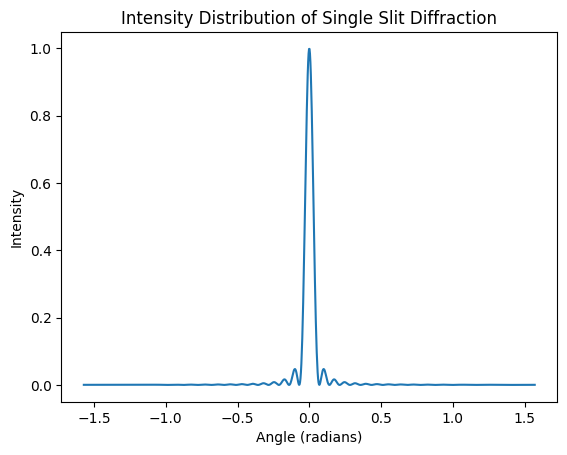

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters 
wavelength = 0.7e-6  # Wavelength of light in meters (e.g., 500 nm)
slit_width = 10e-6   # Width of the slit in meters (e.g., 10 micrometers)


def single_slit_intensity(phi, wavelength, slit_width):
    # Calculate the intensity of light at a given angle theta
    # k = 2 * np.pi / wavelength
    beta = (np.pi * slit_width / wavelength) * np.sin(phi)
    return (np.sin(beta) / beta) ** 2

def plot_intensity_distribution(wavelength, slit_width):
    # Define range of angles
    phi = np.linspace(-np.pi/2, np.pi/2, 1000)
    
    # Calculate intensity distribution
    intensity = single_slit_intensity(phi, wavelength, slit_width)
    
    # Plot the intensity distribution
    plt.plot(phi, intensity)
    plt.xlabel('Angle (radians)')
    plt.ylabel('Intensity')
    plt.title('Intensity Distribution of Single Slit Diffraction')
    plt.grid(False)
    plt.show()

# Plot intensity distribution
plot_intensity_distribution(wavelength, slit_width)

In [2]:
""" 
    single-slit
    Fast Fourier Transform (FFT) method
"""

import numpy as np

class Sheet():
    def __init__(self,extent_x, extent_y, Nx, Ny):

        self.dx = extent_x/Nx
        self.dy = extent_y/Ny

        self.x = self.dx*(np.arange(Nx)-Nx//2)
        self.y = self.dy*(np.arange(Ny)-Ny//2)
        self.xx, self.yy = np.meshgrid(self.x, self.y)
        
        self.Nx = int(Nx)
        self.Ny = int(Ny)
        self.E = np.zeros((self.Ny, self.Nx))

    def rectangular_slit(self,x0, y0, lx, ly):
        """
        Creates a slit centered at the point (x0, y0) with width lx and height ly
        """
        self.E += np.select( [((self.xx > (x0 - lx/2) ) & (self.xx < (x0 + lx/2) )) & ((self.yy > (y0 - ly/2) ) & (self.yy < (y0 + ly/2) )),  True], [1, 0])


Text(0, 0.5, 'y, m')

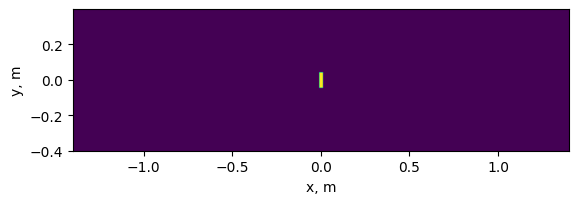

In [3]:
mm = 1e-3
cm = 1e-2

#simulation input:

Lx = 1.4
Ly = 0.4
Nx= 2500
Ny= 1500print(OutData.V[24])


sheet = Sheet(extent_x = 2*Lx , extent_y = 2*Ly, Nx= Nx, Ny= Ny)

#slit separation 
# D = 128 * mm

sheet.rectangular_slit(x0 = 0, y0 = 0, lx = 22 * mm , ly = 88 * mm)
# sheet.rectangular_slit(x0 = -D/2, y0 = 0, lx = 22 * mm , ly = 88 * mm)
# sheet.rectangular_slit(x0 = +D/2, y0 = 0, lx = 22 * mm , ly = 88 * mm)

plt.imshow(sheet.E, extent=[min(sheet.x), max(sheet.x), min(sheet.y), max(sheet.y)])
plt.xlabel("x, m")
plt.ylabel("y, m")

In [4]:
# distance from slit to the screen (mm)
z = 5000

# wavelength (mm)
λ = 400*1e-9
k = 2*np.pi/λ

from scipy.fftpack import fft2
from scipy.fftpack import fftshift

fft_c = fft2(sheet.E * np.exp(1j * k/(2*z) *(sheet.xx**2 + sheet.yy**2)))
c = fftshift(fft_c)

ValueError: not enough values to unpack (expected 2, got 1)

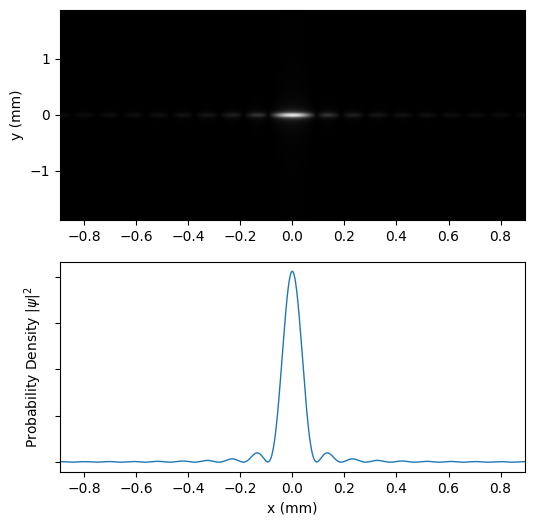

In [5]:
#plot with matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(2,1,1)  
ax2 = fig.add_subplot(2,1,2,sharex=ax1, yticklabels=[])

abs_c = np.absolute(c)

#screen size mm
dx_screen = z*λ/(2*Lx)
dy_screen = z*λ/(2*Ly)
x_screen = dx_screen * (np.arange(Nx)-Nx//2)
y_screen = dy_screen * (np.arange(Ny)-Ny//2)


ax1.imshow(abs_c, extent = [x_screen[0], x_screen[-1]+dx_screen, y_screen[0], y_screen[-1]+dy_screen], cmap ='gray', interpolation = "bilinear", aspect = 'auto')

ax2.plot(x_screen, abs_c[Ny//2]**2, linewidth = 1)

ax1.set_ylabel("y (mm)")
ax2.set_xlabel("x (mm)")
ax2.set_ylabel("Probability Density $|\psi|^{2}$")
ax1.set_xlim([-1,])
ax2.set_xlim([-1,1])
ax1.set_ylim([-1,1])
plt.setp(ax1.get_xticklabels(), visible=False)


plt.show()

Using **Diffractsim** a flexible diffraction simulator for exploring and visualizing physical optics.

Features
 Arbitrary apertures and light spectrums
 Full-path optical propagation and arbitrary zoom in the region of interest
 Lenses
 Phase holograms generation and reconstruction
 GPU acceleration
 Incoherent Light (coming soon)

In [ ]:
%pip install diffractsim

In [ ]:
import diffractsim
diffractsim.set_backend("CPU") #Change the string to "CUDA" to use GPU acceleration

Nx, Ny = 1000, 600

F = diffractsim.MonochromaticField(
    wavelength=632.8 * diffractsim.nm, extent_x=2*Lx, extent_y=2*Ly, Nx=Nx, Ny=Ny
)
F.add(diffractsim.RectangularSlit(width = 22*mm, height = 88*mm, x0 = 0 , y0 = 0))
# F.add(diffractsim.RectangularSlit(width = 22*mm, height = 88*mm, x0 = -70*mm , y0 = 0)
#       + diffractsim.CircularAperture(radius = 55*mm, x0 = 70*mm, y0 = 0))
F.propagate(z)

rgb = F.get_colors()

plt.imshow(rgb, extent=[min(sheet.x), max(sheet.x), min(sheet.y), max(sheet.y)])
# F.plot_colors(rgb)

In [ ]:
plt.imshow(diffractsim.RectangularSlit(width = 22*mm, height = 88*mm, x0 = -70*mm , y0 = 0).get_transmittance(sheet.xx, sheet.yy, λ))

In [ ]:
EE = np.linalg.norm(rgb, axis=2)

plt.plot(np.linspace(-Lx/2, Lx/2, Nx), EE[Ny//2]**2, linewidth = 1)

plt.xlabel("x (m)")
plt.ylabel("Probability Density $|\psi|^{2}$")
plt.xlim([-0.4, 0.4])



In [ ]:
import diffractsim
diffractsim.set_backend("CPU") #Change the string to "CUDA" to use GPU acceleration

Nx, Ny = 1000, 600

F = diffractsim.MonochromaticField(
    wavelength=632.8 * diffractsim.nm, extent_x=2*Lx, extent_y=2*Ly, Nx=Nx, Ny=Ny
)
# F.add(diffractsim.RectangularSlit(width = 22*mm, height = 88*mm, x0 = 0 , y0 = 0))
F.add(diffractsim.RectangularSlit(width = 22*mm, height = 88*mm, x0 = -70*mm , y0 = 0)
      + diffractsim.RectangularSlit(width = 22*mm, height = 88*mm, x0 = 70*mm , y0 = 0))

# RectangularSlit(width = 0.2*mm, height = 1.5*mm, x0 = -D/2 , y0 = 0)   +   RectangularSlit(width = 0.2*mm, height = 1.5*mm, x0 = D/2, y0 = 0)
F.propagate(z)

rgb = F.get_colors()

plt.imshow(rgb, extent=[min(sheet.x), max(sheet.x), min(sheet.y), max(sheet.y)])
# F.plot_colors(rgb)

In [ ]:
plt.imshow(diffractsim.RectangularSlit(width = 22*mm, height = 88*mm, x0 = -70*mm , y0 = 0).get_transmittance(sheet.xx, sheet.yy, λ)
      + diffractsim.RectangularSlit(width = 22*mm, height = 88*mm, x0 = 70*mm , y0 = 0).get_transmittance(sheet.xx, sheet.yy, λ))

In [ ]:
import diffractsim
diffractsim.set_backend("CPU") #Change the string to "CUDA" to use GPU acceleration

F = diffractsim.MonochromaticField(
    wavelength=432.8 * diffractsim.nm, extent_x=2*Lx, extent_y=2*Ly, Nx=Nx, Ny=Ny
)

F.add(diffractsim.CircularAperture(radius = 45*mm, x0 = 0, y0 = 0))

F.propagate(z)
rgb = F.get_colors()
F.plot_colors(rgb)

In [ ]:
plt.imshow(diffractsim.CircularAperture(radius = 55*mm, x0 = 0, y0 = 0).get_transmittance(sheet.xx, sheet.yy, λ))

### 2.2. Electron Diffraction

In [6]:

import numpy as np
# import matplotlib

# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
from scipy import special
from scipy.interpolate import interp1d as interp1d
from pylab import *

from scipy.linalg import toeplitz
from time import process_time


# from mpl_toolkits.mplot3d import Axes3D


In [7]:
ci		= complex(0,1)
Ryd		= 219474.6313710
au_to_eV	= 27.2113834
au_to_Ang	= 0.5291772083
au_to_amu = 5.4857990946e-4
au_to_fm  = 0.5291772083e5
au_to_MeV = 1./3.67493245e4
au_to_sec = 2.4188843e-17

In [8]:
#observable

def MidPointsOperator(dx):
	return ( np.concatenate([[0],dx]) + np.concatenate([dx,[0]]) )/2

def midPoints(x):
	Nshape = x.shape
	N = Nshape[-1]
	Naxis = len(Nshape)-1

	return (x.take(range(1,N),axis=Naxis) + x.take(range(0,N-1),axis=Naxis))/2

In [9]:
import math


def func_timetest(fname1,arg1,fname2=None,arg2=None):

	wtime1 = process_time( )
	out1 = fname1(*arg1)
	wtime1 = process_time( )-wtime1
	print('<br>\tt1=%g s for %s'% (wtime1,fname1.__name__))
	if fname2==None:
		return
	wtime2 = process_time( )
	out2 = fname2(*arg2)
	wtime2 = process_time( )-wtime2
	print('<br>\tt2=%g s (ratio=%g) for %s'% (wtime2,wtime2/wtime1,fname2.__name__))


	if type(out1) is tuple:
		if not len(out1)==len(out2):
			print('<br>Output of %s and %s functions is fifferent.'%(fname1,fname2))
			return
		for i in range(len(out1)):
			print('<br>\t\tnorm of output ',i,' is\t',np.linalg.norm( out1[i]-out2[i] ))
	else:
		print('<br>\t\tnorm of single output is\t',np.linalg.norm( out1-out2 ))
		


def Get_Initial_Wave_Packet2D(x,y,k0x,a0x,k0y,a0y):
	Ax = (2/(np.pi*a0x**2))**(1/4)*np.exp(-(x/a0x)**2)*np.exp(ci*k0x*x)
	Ay = (2/(np.pi*a0y**2))**(1/4)*np.exp(-(y/a0y)**2)*np.exp(ci*k0y*y)
	Psi=	np.einsum( 'x,y->xy',Ax,Ay )

	return Psi


def Get_Analytical_Solution2D(Psi,Nx,Ny,a0x,a0y,k0x,k0y,x,xc,y,yc,mu,t):
	RX,RY = np.meshgrid(x-xc,y-yc, sparse=False, indexing='ij')

	Cx = (2*a0x**2/np.pi)**(1./4.)
	theta_x = math.atan(2*t/(mu*a0x**2))/2.
	phase_x = -theta_x-k0x**2*t/(2*mu)
	tmp_ax = (a0x**4+4*t**2/mu**2)**(1./4.)

	Cy = (2*a0y**2/np.pi)**(1./4.)
	theta_y = math.atan(2*t/(mu*a0y**2))/2.
	phase_y = -theta_y-k0y**2*t/(2*mu)
	tmp_ay = (a0y**4+4*t**2/mu**2)**(1./4.)

	#   Cohen page 65
	Psi_analytic = Cx*np.exp(ci*phase_x)/tmp_ax*np.exp(-(RX-k0x*t/mu)**2/(a0x**2+2*ci*t/mu))*\
				Cy*np.exp(ci*phase_y)/tmp_ay*np.exp(-(RY-k0y*t/mu)**2/(a0y**2+2*ci*t/mu))

	rms = np.einsum('ij->', abs(Psi_analytic-Psi)**2 )

	#print("time=%g rms=%g"%(t,sqrt(rms)/(Nx*Ny)))

	Delta_X_analytic = a0x/2.*np.sqrt(1+(2*t/(mu*a0x**2))**2)
	Delta_Y_analytic = a0y/2.*np.sqrt(1+(2*t/(mu*a0y**2))**2)

	return Psi_analytic,Delta_X_analytic,Delta_Y_analytic


def Get_Propagator_Chebyshev_Expansion(Psi,H,a,z):
#   This fucntion advances Psi in time units of delta t by 
#   the Chebyshev expansion of the propagator.
#   Function march corrected by A.Korovin

	Hz = H*z
	g0,g1 = Psi, np.dot(Hz,Psi)
	Psi = a[0]*g0 + a[1]*g1

	for jt in range(2,len(a)):
		g0,g1 = g1, g0 + np.dot(Hz,g1)*2 # reccurence of Chebyshev polynomials
		Psi += a[jt]*g1 # accumulation step

	Psi1 = np.dot(H,Psi)
	#Psi2 = dot(H,Psi1)

	#return Psi,Psi1,Psi2
	return Psi,Psi1

def Get_Chebyshev_Coefficients(Nc,Nc_max,amin,r):
	a=np.zeros(Nc_max,float)

	C=2
	#print('Nc initial=%d'%Nc)
	a[0] = special.jv(0,r)
	k = np.arange(1,Nc)
	a[k] = C*special.jv(k,r)

	while (a[Nc-1] > amin):
		a[Nc] = C*special.jv(Nc,r)
		Nc+=1

		if(Nc>Nc_max):
			print('The argument of the Chebyshev exp. is too large')
			break

	#print('r=%g'%r,', Nc=',Nc)

	return a[:Nc],Nc


def Get_Kinetic_Operator(x,mu,LBOXx,Type):
	""" 
		Calculation of the kinetic operator

		inputs:
			x -	vector of  coordinate
			mu -mass
			LBOXx- the length of simulation box
			Type - type of the discretization for the kinetic operator

		Outputs:
			T - 2D array of the kinetic operator 
	
	"""
	print('<br>LBox=',LBOXx)
	print('<br>x.min()=',x.min())
	print('<br>x.max()=',x.max())
	#LBOXx= 0.00377945037811637

	print('<br>Type=',Type)

	N = len(x)
	if(Type==0):
		coef= (np.pi/LBOXx)**2/mu
		Di	= np.arange(1,N)
		if(N%2==0):
			T_diag		= (N*N+2)/6.
			T_nondiag	= (-1.)**Di/(np.sin(Di*np.pi/N))**2
			#print('<br>even T=',coef*hstack( (T_diag, T_nondiag) ))
		else:
			T_diag		= (N*N-1)/6.
			T_nondiag	= (-1.)**Di*np.cos(Di*np.pi/N)/(np.sin(Di*np.pi/N))**2
		T = toeplitz( coef*np.hstack( (T_diag, T_nondiag) ) )
	elif(Type==1):
		# np.sin basis set
		coef	= (np.pi/LBOXx)**2/(2*mu)/2
		T = np.zeros((N,N),float)
		I1, I2 = np.meshgrid(np.arange(N),np.arange(N))
		cind = np.logical_not(I1==I2)
		DI = I1[cind]-I2[cind]
		SI = I1[cind]+I2[cind]
		T[cind] = coef*(-1.)**DI*(1./np.sin(np.pi*DI/(2*(N+1)))**2 - 1./np.sin(np.pi*(SI+2)/(2*(N+1)))**2)
		cind = (I1==I2)
		T[cind] = coef*((2*(N+1)**2+1)/3. - 1/np.sin(np.pi*(I1[cind]+1)/(N+1))**2)
	elif(Type==2):
		i = (np.arange(N)).reshape(len(x),1)
		xx = x.reshape(len(x),1)
		np.seterr(divide='ignore') # it will be correct Inf in diagonal elements
		T = (-1.)**(i.T-i)*(xx.T+xx)/np.sqrt(xx.T*xx)/(xx.T-xx)**2/(2*mu)
		np.seterr(divide='warn')
		np.fill_diagonal(T, 1./(12*x**2)*(4+(4*N+2)*x-x**2)/(2*mu) ) #-2*(N-1)/3-1/2+x[i]**2/3

	elif(Type==3):
		i = (np.arange(N)).reshape(len(x),1)
		xx = x.reshape(len(x),1)
		np.seterr(divide='ignore') # it will be correct Inf in diagonal elements
		T = (-1.)**(i.T-i)*(2./(xx.T-xx)**2-1./2)/(2*mu) # 1/2-2/(x[i]-x[ip])**2
		np.seterr(divide='warn')
		np.fill_diagonal(T, (4*N-1-2*x**2)/6./(2*mu) ) #-2*(N-1)/3-1/2+x[i]**2/3

	return T


def Get_Kinetic_Operator2D(x,y,mu,LBOXx,LBOXy,Type=0):
	return Get_Kinetic_Operator(x,mu,LBOXx,Type), Get_Kinetic_Operator(y,mu,LBOXy,Type)


def Get_Hamiltonian_Operator2D(Nx,Ny,Tx,Ty,V):

	return   (np.einsum('ij,kl->ikjl', Tx, np.eye(Ny,Ny))+\
			np.einsum('ij,kl->ljki', Ty, np.eye(Nx,Nx))).reshape((Nx*Ny,Nx*Ny))+\
			np.diag(V.flatten()) # H[xy,xy]


def Get_E_min_max2D(V,delta_x,delta_y,mu):
	pxmax = np.pi/delta_x.min()
	pymax = np.pi/delta_y.min()
	Emax = (pxmax**2+pymax**2)/(2.*mu)+V.max()
	Emin = V.min()
	Eshift = (Emax+Emin)/2

	return Emax,Emin,pxmax,pymax,Eshift


def Get_Observables2Dsingle(psi,psi1,delta_x,delta_y,Eshift=0):
	dx,dy	= delta_x,delta_y

	norm = abs( dx @ (np.conj(psi)*psi) @ dy )

	E = Eshift + dx @ (np.conj(psi)*psi1) @ dy
	E = np.sign(np.real(E))*abs(E) # need to be checked for energy

	return norm,E


def Get_Heisenberg_Uncertainty2Dsingle(psi,x,delta_x0,delta_x,y,delta_y0,delta_y,kx=None,delta_kx=None,ky=None,delta_ky=None,psi_FT=None,Type=0):
	pp = np.conj(psi)*psi
	dx,dy = delta_x,delta_y

	x_average = (x*dx) @ pp @ dy
	y_average = dx @ pp @ (y*dy)
	xsquare_average	= abs( (x**2*dx) @ pp @ dy )
	ysquare_average	= abs(dx @ pp @ (y**2*dy) )

	# Momentum
	if psi_FT is None:
		psiy = psi
		psix = np.moveaxis(psi,[0,1],[1,0])

		grad_psix,laplacien_psix	= Derivatives2(psix, delta_x0, delta_x, Type) # -laplacien_psix
		grad_psiy,laplacien_psiy	= Derivatives2(psiy, delta_y0, delta_y, Type) # -laplacien_psiy
		px_average	= ((np.conj(psix)*grad_psix) @ delta_x) @ delta_y
		pxsquare_average = abs( ((np.conj(psix)*laplacien_psix) @ delta_x) @ delta_y )
		py_average	= ((np.conj(psiy)*grad_psiy) @ delta_y) @ delta_x
		pysquare_average = abs( ((np.conj(psiy)*laplacien_psiy) @ delta_y) @ delta_x )
	else:
		pp_FT = np.conjugate(psi_FT) * psi_FT
		dkx, dky	= delta_kx, delta_ky

		px_average			= abs( (kx * dkx) @ pp_FT @ dky )
		py_average			= abs(      dkx @ pp_FT @ (ky*dky) )
		pxsquare_average	= abs( (kx**2 * dkx) @ pp_FT @ dky )
		pysquare_average	= abs(         dkx @ pp_FT @ (ky**2*dky) )
		print(f"{type(pp_FT)}, {type(px_average)}, {type(py_average)}, ")


	Delta_X				= np.sqrt(xsquare_average - x_average**2)
	Delta_Y				= np.sqrt(ysquare_average - y_average**2)
	Delta_Px			= np.sqrt(pxsquare_average - px_average**2)
	Delta_Py			= np.sqrt(pysquare_average - py_average**2)
	Heisenberg_X		= Delta_X * Delta_Px
	Heisenberg_Y		= Delta_Y * Delta_Py
	Heisenberg			= Heisenberg_Y + Heisenberg_X

	return Heisenberg,\
	Heisenberg_X,\
	Heisenberg_Y,\
	x_average,\
	px_average,\
	Delta_X,\
	Delta_Px,\
	y_average,\
	py_average,\
	Delta_Y,\
	Delta_Py


def Derivatives2(f,dx0,dx,Type=0, order=2):
	Nshape = f.shape
	N = Nshape[-1]-1
	Naxis = len(Nshape)-1

	if Type==0:
		deltay = f.take(np.concatenate((range(1,N+1),[0],)),axis=Naxis) - f
		dy_dx = deltay/dx0
		dy_dx_out = (dy_dx.take(np.concatenate(([N],range(N))),axis=Naxis)+dy_dx)/2
	elif Type==1:
		if Naxis==0:
			O = [[0]]
		else:
			O = np.zeros((np.append(Nshape[:-1],[[1]])))
		deltay = np.concatenate([f,O],axis=Naxis) - np.concatenate([O,f],axis=Naxis)
		dy_dx = deltay/dx0
		dy_dx_out = midPoints(dy_dx)
	elif Type==2 or Type==3:
		deltay = np.diff(f, axis=Naxis)
		dy_dx = deltay/dx0
		O = np.zeros((np.append(Nshape[:-1],[[1]])))
		dy_dx_out = np.concatenate([dy_dx,O],axis=Naxis)

	if order==1:
		return dy_dx_out

	if Type==0:
		d2y_dx2_out = ( dy_dx.take(np.r_[1:N+1,0],axis=Naxis) - dy_dx)/dx
	elif Type==1:
		d2y_dx2_out = np.diff(dy_dx, axis=Naxis)/dx
	elif Type==2 or Type==3:
		d2y_dx2_out = np.concatenate([O,np.diff(dy_dx, axis=Naxis)/dx[1:-1],O],axis=Naxis)


	return dy_dx_out,d2y_dx2_out

In [10]:
def CAP(x,LCAP,xL,A2):
	CAP = np.zeros(x.shape,float)
	condition = np.logical_and(x>=(xL-LCAP), x<=xL)
	xbar = (x[condition]-(xL-LCAP))/LCAP
	CAP[condition] = 3/2*A2*xbar**2

	return CAP

def Get_CAP_Magnetude(Ekin_min,Ekin_max,m,LCAP):
	cc		= np.array((2.88534, -0.0628886, -0.0853079, 0.0133969, -0.00078675, 1.65013e-5))
	func_l	= lambda l : cc[5]*l**5+cc[4]*l**4+cc[3]*l**3+cc[2]*l**2+cc[1]*l+cc[0]

	if Ekin_max==None:
		Ekin_average		= Ekin_min
	else:
		Ekin_average		= Ekin_min**0.6242 * Ekin_max**0.3759

	lambda_dB_average	= 2*pi/sqrt(2*m*Ekin_average)

	L_lambda			= np.linspace(0.001,15,100)
#	A2_E				= func_l(L_lambda)
	A2					= func_l(LCAP/lambda_dB_average)*Ekin_average

	return A2,Ekin_average,lambda_dB_average


def Get_Constant_K(Nk,delta_x):
	kmax = np.pi/delta_x.max()
	#k = np.linspace(-kmax,kmax+2*kmax/(Nk-1), num=Nk+1)
	#k = k[:-1]
	#delta_k=k[1]-k[0] 
	k = np.linspace(-kmax,kmax+kmax/Nk, num=2*Nk+1, endpoint=False)
	delta_k = MidPointsOperator(np.diff(k))
	return k,delta_k,kmax

def Get_Constant_K2D(Nkx,delta_x,Nky,delta_y):
	kx,delta_kx,kxmax = Get_Constant_K(Nkx,delta_x)
	ky,delta_ky,kymax = Get_Constant_K(Nky,delta_y)

	return kx,delta_kx,kxmax,ky,delta_ky,kymax


In [11]:

# These functions Generate the profile of the potential energy and used in the function Get_Profile.

def Get_Potential_Operator(x,InputData,Pot_Type=0):
	k = 1e5
	if Pot_Type==0: # Infinite
		V0		= InputData['V0']		if 'V0'		in InputData	else 1e3
		V = np.zeros(x.shape,float)
		V[[0,-1]] = V0

	elif Pot_Type==1: # Rectangular
		V0		= InputData['V0']		if 'V0'		in InputData	else 1
		x0		= InputData['x0']		if 'x0'		in InputData	else -1
		xL		= InputData['xL']		if 'xL'		in InputData	else 1
		V = V0*(np.tanh(k*(x-xL))-np.tanh(k*(x-x0)))/2
		V[[0,-1]] = k

	elif Pot_Type==2 or Pot_Type==3: # N rectangular wells (Double wells, Double steps well)
		V0		= InputData['V0']		if 'V0'		in InputData	else 1
		x0		= InputData['x0']		if 'x0'		in InputData	else -1
		xL		= InputData['xL']		if 'xL'		in InputData	else 1
		V = np.zeros(x.shape,float)
		for n,v0 in enumerate(V0) :
			V += Get_Potential_Operator(x,{'V0':V0[n],'x0':x0[n],'xL':xL[n]},Pot_Type=1)

	elif(Pot_Type==20):
		V = np.zeros(x.shape,float)
	# elif(Pot_Type==21):
	# 	V0		= InputData['V0']		if 'V0'		in InputData	else 1
	# 	xc		= InputData['xc']		if 'xc'		in InputData	else 0
	# 	dx		= InputData['dx']		if 'dx'		in InputData	else 1e-2
	# 	V = V0*np.tanh((x-xc)/dx)/2+V0/2
	# elif(Pot_Type==22): #barrier potential
	# 	V0		= InputData['V0']		if 'V0'		in InputData	else 1
	# 	xc		= InputData['xc']		if 'xc'		in InputData	else 0
	# 	dx		= InputData['dx']		if 'dx'		in InputData	else 1e-2
	# 	d		= InputData['d']		if 'd'		in InputData	else 1
	# 	V = V0*(np.tanh((x-(xc-d/2))/dx)-np.tanh((x-(xc+d/2))/dx))/2

	else:
		print("Uknown Pot_Type type (use Pot_Type=0 for .. and Pot_Type=1 for..), Pot_Type=",Pot_Type)

	return V


def Get_Potential_Operator2D(x,y,InputData,Pot_Type=5):

	if(Pot_Type==20):
		#V0		= InputData['V0']		if 'V0'	in InputData	else 1
		Nx = len(x)
		Ny = len(y)
		#V = V0*np.ones((Nx,Ny),float)
		V = np.zeros((Nx,Ny),float)
	elif(Pot_Type==31):
		V0		= InputData['V0']		if 'V0'	in InputData	else 100
		d		= InputData['l']		if 'l'	in InputData	else 5
		ls		= InputData['ls']		if 'ls'	in InputData	else 10
		xc		= InputData['xc']		if 'xc'	in InputData	else 0
		yc		= InputData['yc']		if 'yc'	in InputData	else 0
		Nx = len(x)
		Ny = len(y)
		print('<br>l=',d)
		print('<br>xc=',xc)
		print('<br>ls=',ls)
		print('<br>yc=',yc)
		V = np.zeros((Nx,Ny),float)
		X,Y = np.meshgrid(x-xc,y-yc, sparse=False, indexing='ij')
		condition = np.logical_and(abs(X) < d/2, abs(Y) > ls/2)
		# V[condition] = V0*exp(-abs(X[condition]))
		V[condition] = V0
	elif(Pot_Type==32):
		V0		= InputData['V0']		if 'V0'	in InputData	else 100
		d		= InputData['l']		if 'l'	in InputData	else 8
		ls		= InputData['ls']		if 'ls'	in InputData	else 4
		ly		= InputData['ly']		if 'ly'	in InputData	else 8
		xc		= InputData['xc']		if 'xc'	in InputData	else 0
		yc		= InputData['yc']		if 'yc'	in InputData	else 0
		Nx = len(x)
		Ny = len(y)
		V = np.zeros((Nx,Ny),float)
		X,Y = np.meshgrid(x-xc,y-yc, sparse=False, indexing='ij')

		# rectangular
		condition = abs(X) < d/2 # ecran
		condition[abs(Y-ly/2) < ls/2] = False # slit 1
		condition[abs(Y+ly/2) < ls/2] = False # slit 2
		V[condition] = V0
		
	elif(Pot_Type==33):
		V0		= InputData['V0']		if 'V0'	in InputData	else 100
		l		= InputData['l']		if 'l'	in InputData	else 8
		ls		= InputData['ls']		if 'ls'	in InputData	else 4
		ly		= InputData['ly']		if 'ly'	in InputData	else 8
		nslits	= InputData['n_slits']	if 'n_slits'	in InputData	else 3
		xc		= InputData['xc']		if 'xc'	in InputData	else 0
		yc		= InputData['yc']		if 'yc'	in InputData	else 0
		Nx = len(x)
		Ny = len(y)
		V = np.zeros((Nx,Ny),float)
		X,Y = np.meshgrid(x-xc,y-yc, sparse=False, indexing='ij')

		condition = abs(X)<l/2 # ecran
		y0 = ly*(nslits-1) / 2
		for i in range(nslits):
			condition[abs(Y-y0+i*ly)<ls/2] = False # slit i

		V[condition] = V0

	else:
		print("Uknown type Pot_Type=",Pot_Type)

	return V


def Get_Potential_Operator_orbital(r,l,mu):
	print("<br>1 mu=",mu)
	print("<br>1 l=",l)
	r[r==0] = 1e-4
	return l*(l+1)/(2*mu*r**2)


def Get_Potential_Operator_spinorbite(r,s,l,J,me,e):
	c = 137
#	me = 1
#	e = 1
	return e**2*(J*(J+1)-l*(l+1)-s*(s+1))/(2*me**2*c**2*r**3)


# def Get_Potential_Operator_from_file(fname):
# 	print('fname=',fname)
# 	data= open(fname, "r")
# 	lines=data.readlines()
# 	N = len(lines)

# 	x = np.zeros(N,float)
# 	V = np.zeros(N,float)
# 	for i,line in enumerate(lines):
# 		p = line.split()
# 		x[i] = float(p[0])
# 		V[i] = float(p[1])
# 	data.close()

# 	return V,x,x.min(),x.max(), np.diff(x)


In [12]:
# These functions used by the function Get_Profile for generation of the spatial grid for 1D and 2D cases.

import sys

def Get_Grid(N,x0,xL=0,delta_x=None,Type=0):
	""" 
		These functions used by the function Get_Profile for generation of the spatial grid for 1D and 2D cases.

	"""
	print("<br>Get_Grid Type=",Type)

	if(Type==0):
		x=np.zeros(N,float)   # declare of the grid point
		if delta_x==None:
			LBOX = xL-x0
			#x = np.linspace(x0,xL, num=N, endpoint=True)
			x = np.linspace(x0,xL, num=N+1)
			delta_x0 = np.diff(x)
		else:
			delta_x0 = delta_x
			x = x0+np.cumsum(delta_x[:-1])
			LBOX = x.max()-x0
		x = x[:-1]
		delta_x = np.concatenate([[delta_x0[0] + delta_x0[-1]],delta_x0[:-1] + delta_x0[1:]])/2

	if(Type==1):
		x=np.zeros(N,float)   # declare of the grid point
		if delta_x==None:
			LBOX = xL-x0
			x = np.linspace(x0,xL, num=N+2)
			delta_x0 = np.diff(x)
		else:
			delta_x0 = delta_x
			x = x0+np.cumsum(delta_x[:-1])
			LBOX = x.max()-x0
		x = x[1:-1] #x0 and xL are excluded from the grid
		delta_x	= (delta_x0[:-1] + delta_x0[1:])/2

	else:
		print("<br>Uknown input method (use Type=0 for .. and Type=1 for..), Type=",Type)

	print('<br> Get_Grid x.shape=',x.shape)
	print('<br> Get_Grid delta_x0.shape=',delta_x0.shape)
	print('<br> Get_Grid delta_x.shape=',delta_x.shape)
	return x,delta_x0,delta_x,LBOX


def Get_Constant_Grid(N,x0,xL,Type=0):
	""" 
		These functions used by the function Get_Profile for generation of the spatial grid for 1D and 2D cases.

	"""
	# build the grid point
	LBOX = xL-x0
	if(Type==0):
		x			= np.linspace(x0,xL, num=N+1)
		delta_x0	= np.diff(x)
		delta_x		= np.concatenate([[delta_x0[0]+delta_x0[-1]],delta_x0[:-1]+delta_x0[1:]])/2
		x = x[:-1]

	elif(Type==1):
		x			= np.linspace(x0,xL, num=N+2)
		delta_x0	= np.diff(x)
		delta_x		= (delta_x0[:-1]+delta_x0[1:])/2
		x = x[1:-1] #x0 and xL are excluded from the grid

	else:
		print("<br>Uknown input method (use Type=0 for .. and Type=1 for..), Type=",Type)

	print('<br>   Get_Constant_Grid x.shape=',x.shape)
	print('<br>   Get_Constant_Grid delta_x0.shape=',delta_x0.shape)
	print('<br>   Get_Constant_Grid delta_x.shape=',delta_x.shape)
	return x,delta_x0,delta_x,LBOX


def Get_Constant_Grid2D(Nx,x0,xL,Ny,y0,yL,Type=0):
	""" 
		These functions used by the function Get_Profile for generation of the spatial grid for 1D and 2D cases.

	"""
	x,delta_x0,delta_x,LBOXx = Get_Constant_Grid(Nx,x0,xL,Type)
	y,delta_y0,delta_y,LBOXy = Get_Constant_Grid(Ny,y0,yL,Type)

	return x,delta_x0,delta_x,y,delta_y0,delta_y,LBOXx,LBOXy

In [118]:
def Get_Profile(InputData):
	"""
		Calculate potential energy profile and correct input data.

		input:
		 Fields of InputData argument and their default values:
			Dimensionality - 2
			Type - Type of kinetic operator discretisation  - 0 plane waves basis set - in this case
															- 1 sine basis set
			Pot_Type - type of the profile of the potential energy for barriers:
															- 20 free particle
															- 31 Infinite well for 1 slit
															- 32 Infinite well for 2 slits
															- 33 Infinite well for n slits 
			V0 - Potential energy height - 1
			mu - mass - 1
			Nx - Number of points along x-axis - 100
			Ny - Number of points along y-axis - 100
			x0 - Starting x-coordinate - 0
			y0 - Starting y-coordinate - 0
			xL - Ending x-coordinate - 1
			yL - Ending y-coordinate - 1
		
		output:
		 Fields of OutData argument :
			V - Vector of the potential energy data
			x - x-coordinate
			y - y-coordinate
	"""
	OutData				= lambda:0

	if not hasattr(InputData, 'Dimensionality'):
		print ('<br>The Dimensionality of the task is not defined! Use default 1D (Dimensionality = 1)')
		InputData.Dimensionality	= 1
	print("<br>Dimensionality=",InputData.Dimensionality)

	# Type of kinetic operator discretisation
	if not hasattr(InputData, 'Type'):
		print ('<br>The type of discretization of the kinetic operator is not defined! Use default (Type = 0)')
		InputData.Type	= 0
	print("<br>Type=",InputData.Type)
	if(InputData.Type==0):
		print("<br>Using plane waves basis set without endpoint")

	# complex profile
	if not hasattr(InputData, 'isCAP'):
		InputData.isCAP = 0
	print("<br>isCAP=",InputData.isCAP)

	# effective mass
	if not hasattr(InputData, 'mu'):
		InputData.mu		= 1
	if InputData.mu==0: # fictive particle reduced-mass
		me=1.
		mH=1.007825032/5.4857990946e-4
		m1=mH+me
		m2=m1
		InputData.mu=m1*m2/(m1+m2)
		print("<br>Defaul mass=%g u.a."%InputData.mu)
	print('<br>mu=',InputData.mu)

	# x-axis parameters
	if not hasattr(InputData, 'Nx'):
		InputData.Nx		= 100
	print("<br>Nx=",InputData.Nx)
	if not hasattr(InputData, 'x0'):
		InputData.x0		= 0
	print("<br>x0=",InputData.x0)
	if not hasattr(InputData, 'xL'):
		InputData.xL		= 1
	print("<br>xL=",InputData.xL)
	if not hasattr(InputData, 'xc'):
		InputData.xc		= (InputData.xL+InputData.x0)/2
	print("<br>xc=",InputData.xc)
	# y-axis parameters
	if InputData.Dimensionality==2:
		if not hasattr(InputData, 'Ny'):
			InputData.Ny		= 100
		print("<br>Ny=",InputData.Ny)
		if not hasattr(InputData, 'y0'):
			InputData.y0		= 0
		print("<br>y0=",InputData.y0)
		if not hasattr(InputData, 'yL'):
			InputData.yL		= 1
		print("<br>yL=",InputData.yL)
		if not hasattr(InputData, 'yc'):
			InputData.yc		= (InputData.yL+InputData.y0)/2
		print("<br>yc=",InputData.yc)


	if not hasattr(InputData, 'l'):
		InputData.l			= 0
	print("<br>l=",InputData.l)

	# Profile type
	if not hasattr(InputData, 'Pot_Type'):
		print ('<br>The potential profile is not define! Use default free (Pot_Type = 0)')
		InputData.Pot_Type	= 20
	
	print("<br>Pot_Type_cu-cu=",InputData.Pot_Type)

	if(InputData.Pot_Type==20):
		print ('<br>free particle')

		InputData.xmin_g,InputData.xmax_g	= InputData.x0,InputData.xL
		#free-particle 2D
		if InputData.Dimensionality==1:
			OutData.x,InputData.delta_x0,InputData.delta_x,InputData.LBOXx = Get_Grid(InputData.Nx,InputData.xmin_g,InputData.xmax_g,Type=InputData.Type)

			OutData.V = Get_Potential_Operator(OutData.x,None,InputData.Pot_Type)
		elif InputData.Dimensionality==2:
			InputData.ymin_g,InputData.ymax_g	= InputData.y0,InputData.yL

			OutData.x,InputData.delta_x0,InputData.delta_x,OutData.y,InputData.delta_y0,InputData.delta_y,InputData.LBOXx,InputData.LBOXy	= Get_Constant_Grid2D(InputData.Nx,InputData.x0,InputData.xL,InputData.Ny,InputData.y0,InputData.yL,InputData.Type)
			
			#   Build the potential 
			OutData.V = Get_Potential_Operator2D(OutData.x,OutData.y,None,InputData.Pot_Type)

	elif(InputData.Pot_Type==31): # slits
		if InputData.Dimensionality==1:
			print ('<br>The Dimensionality of the task is changed to 2D (Dimensionality = 2)')
			InputData.Dimensionality = 2
		
		#   Barrier parameters
		if not hasattr(InputData, 'V0'):
			InputData.V0		= 100
		print("<br>V0=",InputData.V0)

		if not hasattr(InputData, 'slit_d'):
			InputData.slit_d		= 5
		print("<br>slit_d=",InputData.slit_d)
		
		if not hasattr(InputData, 'slit_ls'):
			InputData.slit_ls		= InputData.d
		print("<br>slit size, slit_ls=",InputData.slit_ls)

		InputData.xmin_g,InputData.xmax_g	= InputData.x0,InputData.xL
		InputData.ymin_g,InputData.ymax_g	= InputData.y0,InputData.yL

		OutData.x,InputData.delta_x0,InputData.delta_x,OutData.y,InputData.delta_y0,InputData.delta_y,InputData.LBOXx,InputData.LBOXy	= Get_Constant_Grid2D(InputData.Nx,InputData.x0,InputData.xL,InputData.Ny,InputData.y0,InputData.yL,InputData.Type)

		OutData.V = Get_Potential_Operator2D(OutData.x,OutData.y,{'V0':InputData.V0,'l':InputData.slit_d,'ls':InputData.slit_ls,'xc':InputData.xc,'yc':InputData.yc},InputData.Pot_Type)
		print (OutData.V)

	elif(InputData.Pot_Type==32):
		if InputData.Dimensionality==1:
			print ('<br>The Dimensionality of the task is changed to 2D (Dimensionality = 2)')
			InputData.Dimensionality = 2
		#   Barrier parameters
		if not hasattr(InputData, 'V0'):
			InputData.V0		= 100
		print("<br>V0=",InputData.V0)
		if not hasattr(InputData, 'slit_d'):
			InputData.slit_d		= 8
		print("<br>slit_d=",InputData.slit_d)
		if not hasattr(InputData, 'slit_ls'):
			InputData.slit_ls		= InputData.slit_d
		print("<br>slit size, slit_ls=",InputData.slit_ls)
		if not hasattr(InputData, 'slit_ly'):
			InputData.slit_ly		= InputData.slit_ls
		print("<br>distance between 2 slits, slit_ly=",InputData.slit_ly)

		InputData.xmin_g,InputData.xmax_g	= InputData.x0,InputData.xL
		InputData.ymin_g,InputData.ymax_g	= InputData.y0,InputData.yL

		OutData.x,InputData.delta_x0,InputData.delta_x,OutData.y,InputData.delta_y0,InputData.delta_y,InputData.LBOXx,InputData.LBOXy	= Get_Constant_Grid2D(InputData.Nx,InputData.x0,InputData.xL,InputData.Ny,InputData.y0,InputData.yL,InputData.Type)

		OutData.V = Get_Potential_Operator2D(OutData.x,OutData.y,{'V0':InputData.V0,'l':InputData.slit_d,'ls':InputData.slit_ls,'ly':InputData.slit_ly,'xc':InputData.xc,'yc':InputData.yc},InputData.Pot_Type)

		print (OutData.V)

	elif(InputData.Pot_Type==33):
		if InputData.Dimensionality==1:
			print ('<br>The Dimensionality of the task is changed to 2D (Dimensionality = 2)')
			InputData.Dimensionality = 2
		#   Barrier parameters
		if not hasattr(InputData, 'V0'):
			InputData.V0		= 100
		print("<br>V0=",InputData.V0)
		if not hasattr(InputData, 'slit_d'):
			InputData.slit_d		= 8
		print("<br>slit_d=",InputData.slit_d)
		if not hasattr(InputData, 'slit_ls'):
			InputData.slit_ls		= InputData.slit_d
		print("<br>slit size, slit_ls=",InputData.slit_ls)
		if not hasattr(InputData, 'slit_ly'):
			InputData.slit_ly		= InputData.slit_ls
		print("<br>distance between 2 slits, slit_ly=",InputData.slit_ly)
		if not hasattr(InputData, 'slit_nslits'):
			InputData.slit_nslits		= 3
		print("<br>number of slits, n_slits=", InputData.slit_nslits)

		if(InputData.slit_nslits * InputData.slit_ls + (InputData.slit_nslits - 1+2) * InputData.slit_ly >= (InputData.yL - InputData.y0)):
			sys.exit('Number of slits too large for the current grid!!!') 

		InputData.xmin_g,InputData.xmax_g	= InputData.x0,InputData.xL
		InputData.ymin_g,InputData.ymax_g	= InputData.y0,InputData.yL

		OutData.x,InputData.delta_x0,InputData.delta_x,OutData.y,InputData.delta_y0,InputData.delta_y,InputData.LBOXx,InputData.LBOXy	= Get_Constant_Grid2D(InputData.Nx,InputData.x0,InputData.xL,InputData.Ny,InputData.y0,InputData.yL,InputData.Type)

		OutData.V = Get_Potential_Operator2D(OutData.x,OutData.y,{'V0':InputData.V0,'l':InputData.slit_d,'ls':InputData.slit_ls,'ly':InputData.slit_ly,'n_slits':InputData.slit_nslits,'xc':InputData.xc,'yc':InputData.yc},InputData.Pot_Type)

	else:
		OutputData.Error = 'The type of potential energy profile is not correct (Pot_Type = %i)!'%(InputData.Pot_Type) # type: ignore

	print("<br>delta_x0.shape=",InputData.delta_x0.shape)
	print("<br>delta_x.shape=",InputData.delta_x.shape)
	print("<br>x.shape=",OutData.x.shape)


	if not InputData.l==0:
		print('<br>l is not 0: add to the potential energy')
		if 	InputData.Dimensionality==1:
			OutData.V += Get_Potential_Operator_orbital(OutData.x,InputData.l,InputData.mu)

	if not hasattr(InputData, 's'):
		InputData.s = None
	print('<br>s=',InputData.s)
	if not hasattr(InputData, 'J'):
		InputData.J = None
	print('<br>J=',InputData.J)
	if (InputData.s is None) or (InputData.J is None):
		print('<br>s=noneType or J=noneType: Calculation without spin-orbit interaction...')
	else:
		print('<br>Total momentum and spin are defined: add the spin-orbit interaction to the potential energy')
		OutData.V += Get_Potential_Operator_spinorbite(OutData.x,InputData.s,InputData.l,InputData.J,1,1)

	print('<br>xmin_g=',InputData.xmin_g)
	print('<br>xmax_g=',InputData.xmax_g)

	return OutData,InputData

In [14]:
# for single eigen state ( psi(x,y) )
def Get_Fourrier_Transform_WF2Dsingle(psi,x,delta_x,y,delta_y,kx,ky):
	KX,X = np.meshgrid(kx,x, sparse=False, indexing='ij')
	KY,Y = np.meshgrid(ky,y, sparse=False, indexing='ij')

	psi_FT = ( (np.exp(-ci*(KX*X)) * delta_x) @ psi @  (np.exp(-ci*(KY*Y))*delta_y).T )/(2*np.pi) # Integrate Trapeze

	return psi_FT

In [129]:

from collections import namedtuple


OutData	= lambda:0
InputData = lambda:0

InputData.Dimensionality = 2

print ('<br>Time-dependent Schrodinger equation solving')
print ('<br>Free propagation of a 2D Gaussian wave packet ')

# ******************************************************************************#
# In calculations Type = 0 is used: plane waves basis set - the method of discretization of the kinetic energy operator

# The barrier profile:	:
# 20 --> free particle
# 31 --> Infinite well for 1 slit
# 32 --> Infinite well for 2 slits
# 33 --> Infinite well for n slits does not work.. Need to fix potential with n_slits
InputData.Pot_Type = 33

# Temporal used to make different calculations:
# Temporal==0 or Temporal==1 show only barrier profile
# Temporal==2 as 0,1 + show only WP profile
# Temporal==3 run temporal evolution calculations
# Temporal==4 run transmittance calculations
InputData.Temporal	= 1

InputData.mu		= 1		# The particle mass, a.u.
InputData.V0		= 100 	# The height of the quantum barrier, a.u.


InputData.Nx	= 100 	# The number of spatial points for the x-axis
InputData.Ny	= 100	# The number of spatial points for the y-axis

InputData.x0	= -50	# The left x-position of the calculation space, a.u.
InputData.xL	=  50	# The right x-position of the calculation space, a.u.
InputData.y0	= -50	# The left y-position of the calculation space, a.u.
InputData.yL	=  50	# The right y-position of the calculation space, a.u.

InputData.d_slit	= 8		# The slit width, a.u.
InputData.ls	= 4		# The slit length, a.u. or ls = 0

#If the number of slits is more than one
InputData.l 	= 8		# The distance between centres of slits (period), a.u.
InputData.n_slits = 3 # The number of slits


# Parameters for the initial wave packet:
#-----------------------------------------------------------------------------
	## The initial position of the wave packet along
InputData.xc_WP = -20   # the x-axis
InputData.yc_WP = 0	  # the y-axis

	## The wave packet width in the direct space along
InputData.a0x	= 10	# the x-axis
InputData.a0y	= 30	# the y-axis

	## The wave vector of the wave packet center in the inverse direct space 
InputData.k0x	= 1		# of the x-axis
InputData.k0y	= 0		# of the y-axis

	## The number of points for the inverse space:
InputData.Nkx	= 52  # of the x-axis
InputData.Nky	= 53  # of the y-axis


# Parameters for temporal evolution of the wave packet :
#-----------------------------------------------------------------------------

	## Time parameters: 
InputData.Nt = 100  		# the number of points for time discretization
InputData.delta_t = 0.1 	# The time step for simulations
InputData.Nc_max 	= 10000	# Thr maximum number of iterations


InputData.amin = 5e-7 	# The accuracy of the Chebyshev decomposition
InputData.epsilon	= 1e-2	# The convergence criteria


	##The screen position for observing the diffraction: 
InputData.x_screen = 20

#???
InputData.omegax	= 1
InputData.omegay	= 1

# Parameters for sep-like potentials
InputData.d = 5.
InputData.sigma = 1e-2

InputData.isCheckOld = True
# InputData.isCheckOld = False




#????????????????????????????????????????????
Lambda = 2 * np.pi/np.sqrt(InputData.k0x**2 + InputData.k0y**2)#max(k0x,k0y)
if not hasattr(InputData, 'ls'):
	ls = 0
	print('ls',ls)
	if(InputData.Pot_Type==31):
		ls = 2*Lambda
	elif(InputData.Pot_Type==32 or InputData.Pot_Type==33):
		ls = Lambda/2
	InputData.ls = ls
print("x-coordinate for which the diffraction spot could be observed is ls**2/Lambda=%g"%(InputData.ls**2/Lambda + (InputData.xL + InputData.x0)/2.))
print("y coordinate for which the diffraction spot could be observed is ls**2/Lambda=%g"%(InputData.ls**2/Lambda))
#????????????????????????????????????????????




## main procedure
OutData,InputData = Get_Profile(InputData)
if hasattr(OutData,'Error'): # return error message if there is an error
	print (OutData)

Emax,Emin,pxmax,pymax,OutData.Eshift = Get_E_min_max2D(OutData.V,InputData.delta_x,InputData.delta_y,InputData.mu)
OutData.V -= OutData.Eshift

print('<br>pxmax=%g, pymax=%g'%(pxmax,pymax))
print('<br>Emin=%g'%Emin)
print('<br>Emax=%g'%Emax)
print('<br>Eshift=%g'%OutData.Eshift)

if(pxmax < InputData.k0x or pymax < InputData.k0y):
	OutData.Error	= 'Attention pxgrid < k0x or pygrid < k0y : increase Nx and Ny or decrease k0x and k0y'
	# print (OutData)
	# out = OutData
#		sys.exit('Attention pxgrid<k0x or pygrid<k0y : increase Nx and Ny or decrease k0x and k0y') 

#   Build the grid for FT
OutData.kx,delta_kx,_,OutData.ky,delta_ky,_	= Get_Constant_K2D(InputData.Nkx,InputData.delta_x0,InputData.Nky,InputData.delta_y0)

if InputData.Temporal==0 or InputData.Temporal==1: # return only barrier profile
	print('<br>return barrier profile')
	print('<br>OutData=',OutData.__dict__)
	# print( OutData)
	# out = OutData

#   Generate an intial wavepacket
Psi			= Get_Initial_Wave_Packet2D(OutData.x-InputData.xc_WP,OutData.y-InputData.yc_WP,InputData.k0x,InputData.a0x,InputData.k0y,InputData.a0y)
Psi_FT		= Get_Fourrier_Transform_WF2Dsingle(Psi,OutData.x,InputData.delta_x,OutData.y,InputData.delta_y,OutData.kx,OutData.ky)

if InputData.Temporal < 3: # show WP and barrier profile
	OutData.psi		= abs(Psi)**2
	OutData.psi_FT	= abs(Psi_FT)**2

	print('<br>return WP parameters')
	print('<br>OutData=',OutData.__dict__)
	# print( OutData)
	# out = OutData


# if InputData.isCheckOld:
# 	func_timetest(Get_Kinetic_Operator2D,(InputData.Nx,InputData.Ny,InputData.mu,OutData.x,InputData.delta_x,OutData.y,InputData.delta_y,InputData.Type),Get_Kinetic_Operator_old,(InputData.Nx,InputData.Ny,InputData.mu,InputData.delta_x,InputData.delta_y,InputData.Type))
#	Tx,Ty = Get_Kinetic_Operator2D(Nx,Ny,InputData.mu,OutData.x,InputData.delta_x,OutData.y,InputData.delta_y,Type)
Tx,Ty = Get_Kinetic_Operator2D(OutData.x,OutData.y,InputData.mu,InputData.LBOXx,InputData.LBOXy,InputData.Type)

# if InputData.isCheckOld:
# 	func_timetest(Get_Hamiltonian_Operator2D,(InputData.Nx,InputData.Ny,Tx,Ty,OutData.V), Get_Hamiltonian_Operator_old,(InputData.Nx,InputData.Ny,Tx,Ty,OutData.V))
H = Get_Hamiltonian_Operator2D(InputData.Nx,InputData.Ny,Tx,Ty,OutData.V)

norm			= np.zeros(InputData.Nt, float)
H_average		= np.zeros(InputData.Nt, float)
Delta_X			= np.zeros(InputData.Nt, float)
Delta_Y			= np.zeros(InputData.Nt, float)
Delta_Px		= np.zeros(InputData.Nt, float)
Delta_Py		= np.zeros(InputData.Nt, float)
Delta_X_analytic= np.zeros(InputData.Nt, float)
Delta_Y_analytic= np.zeros(InputData.Nt, float)
x_average		= np.zeros(InputData.Nt, float)
y_average		= np.zeros(InputData.Nt, float)
px_average		= np.zeros(InputData.Nt, float)
py_average		= np.zeros(InputData.Nt, float)
Heisenberg		= np.zeros(InputData.Nt, float)
Heisenberg_X	= np.zeros(InputData.Nt, float)
Heisenberg_Y	= np.zeros(InputData.Nt, float)
time			= np.zeros(InputData.Nt, float)

#   Bessel coefficients for Chebyshev expansion
r = InputData.delta_t*(Emax - Emin)/2.
z = -ci*InputData.delta_t/r
Nc = int(max(2.0,r)) #nombre de paremtre Chebyshev de devloppement
a,Nc = Get_Chebyshev_Coefficients(Nc,InputData.Nc_max,InputData.amin,r)
print('<br>a=',a)
print('<br>Nc=',Nc)

OutData.Nc				= Nc
OutData.psi_t			= []
OutData.psi_FT_t		= []
OutData.psi_analytic_t	= []
time					= np.linspace(0,(InputData.Nt-1)*InputData.delta_t,InputData.Nt)

# create plot of temporal evolution
	# if InputData.Temporal==5: 	#	create and save video
	# 	fig = plt.figure()
	# 	ax = fig.add_subplot(111, projection='3d')
	# 	ax.set_title ("Temporal evolution", fontsize=16)
	# 	ax.set_xlabel("$x$ (u.a.)", fontsize=14)
	# 	ax.set_ylabel("$y$ (u.a.)", fontsize=14)
	# 	ax.set_zlabel("$|\Psi(x,t)|^2$", fontsize=14)
	# 	X,Y = np.meshgrid(OutData.x,OutData.y, sparse=False, indexing='ij')
	#	KX,KY=np.meshgrid(OutData.kx,OutData.ky, sparse=False, indexing='ij')

#   Save the intial wave paket boundary values
psi0_x0_xL_y0_yL = np.concatenate(([Psi[[0,-1],int(InputData.Ny/2)], Psi[int(InputData.Nx/2),[0,-1]]]))

#    >>>>>>>>  the main time integration loop <<<<<<<<
for it in range(InputData.Nt):
	if it==0:
		Psi1 = np.dot(H,Psi.flatten()).reshape((InputData.Nx,InputData.Ny))
	else:
		Psi,Psi1	= Get_Propagator_Chebyshev_Expansion(Psi.flatten(),H,a,z)
		Psi			= Psi.reshape((InputData.Nx,InputData.Ny))
		Psi1		= Psi1.reshape((InputData.Nx,InputData.Ny))

	norm[it],H_average[it] = Get_Observables2Dsingle(Psi,Psi1,InputData.delta_x,InputData.delta_y,OutData.Eshift)
	Psi_FT	= Get_Fourrier_Transform_WF2Dsingle(Psi,OutData.x,InputData.delta_x,OutData.y,InputData.delta_y,OutData.kx,OutData.ky)
	Heisenberg[it], Heisenberg_X[it], Heisenberg_Y[it], x_average[it], px_average[it], Delta_X[it], Delta_Px[it], y_average[it], py_average[it], Delta_Y[it], Delta_Py[it] =\
	Get_Heisenberg_Uncertainty2Dsingle(
		Psi,OutData.x,
		InputData.delta_x0,
		InputData.delta_x,
		OutData.y,
		InputData.delta_y0,
		InputData.delta_y,
		OutData.kx,
		delta_kx,
		OutData.ky,
		delta_ky,
		psi_FT=Psi_FT,
		Type=InputData.Type
		)


	OutData.psi_t.append(abs(Psi)**2)
	OutData.psi_FT_t.append(abs(Psi_FT)**2)
	if(InputData.Pot_Type==20):
		# if InputData.isCheckOld:
		# 	func_timetest(Get_Analytical_Solution2D,(Psi,Nx,Ny,InputData.a0x,InputData.a0y,InputData.k0x,InputData.k0y,OutData.x,InputData.xc_WP,OutData.y,InputData.yc_WP,InputData.mu,time[it]),Get_Analytic_Solution_old,(Psi,Nx,Ny,a0x,a0y,k0x,k0y,OutData.x,xc_WP,OutData.y,yc_WP,InputData.mu,time[it]))
		Psi_analytic,Delta_X_analytic[it],Delta_Y_analytic[it]=\
			Get_Analytical_Solution2D(Psi,InputData.Nx,InputData.Ny,InputData.a0x,InputData.a0y,InputData.k0x,InputData.k0y,OutData.x,InputData.xc_WP,OutData.y,InputData.yc_WP,InputData.mu,time[it])
		#print('<br>Delta X=%g  Delta X_analytic=%g'%(Delta_X[it],Delta_X_analytic[it]))
		#print('<br>Delta Y=%g  Delta Y_analytic=%g'%(Delta_Y[it],Delta_Y_analytic[it]))
		OutData.psi_analytic_t.append(abs(Psi_analytic)**2)

	# plot temporal evolution
	# if InputData.Temporal==5: 	#	create and save video
	# 	ax.contourf(X, Y, abs(Psi)**2)


	deviation_x0_xL_y0_yL = abs( np.concatenate(([Psi[[0,-1],int(InputData.Ny/2)], Psi[int(InputData.Nx/2),[0,-1]]]))-psi0_x0_xL_y0_yL )
	print('<br>time=%g  norm=%g  <E>=%g  Delta_x0=%g Delta_xL=%g'%(time[it],norm[it],H_average[it],deviation_x0_xL_y0_yL[0],deviation_x0_xL_y0_yL[1]))
	if np.logical_and.reduce(deviation_x0_xL_y0_yL>InputData.epsilon):
		break


if(InputData.Pot_Type==20):
	# print('<br><br>u...')
	for i in range(int(InputData.Nx/2.),InputData.Nx):
		u = OutData.y*np.pi*InputData.ls/Lambda/(OutData.x[i] + 1e-15)
		I = np.sin(u)/(u + 1e-15)
		I[u==0] = 1

		error = sum(abs(abs(Psi[i,:]/Psi[i,int(InputData.Ny/2.)])**2-abs(I)**2))

		if InputData.ls != 0:
			F = (InputData.ls/2.)**2/(Lambda*OutData.x[i] + 1e-15)
			print("<br>x[%d]=%g Lambda/ls=%g Fresnel number=%g error=%g"%(i,OutData.x[i],Lambda/InputData.ls,F,sum(error)))

		OutData.Delta_X_analytic = Delta_X_analytic
		OutData.Delta_Y_analytic = Delta_Y_analytic

print ('<br>Time-dependent Schrodinger equation solving')
# print ('<br>  Normal end of execution.')
# print ('<br>')


it += 1
if it > InputData.Nt:
	it = InputData.Nt
OutData.time				= time[:it]
OutData.H_average			= H_average[:it]
OutData.Delta_X_analytic	= Delta_X_analytic[:it]
OutData.Delta_Y_analytic	= Delta_Y_analytic[:it]
OutData.norm				= norm[:it]
OutData.Heisenberg			= Heisenberg[:it]
OutData.Delta_X				= Delta_X[:it]
OutData.Delta_Y				= Delta_Y[:it]
OutData.Delta_Px			= Delta_Px[:it]
OutData.Delta_Py			= Delta_Py[:it]
OutData.x_average			= x_average[:it]
OutData.y_average			= y_average[:it]
OutData.px_average			= px_average[:it]
OutData.py_average			= py_average[:it]
OutData.Heisenberg			= Heisenberg[:it]
OutData.Heisenberg_X		= Heisenberg_X[:it]
OutData.Heisenberg_Y		= Heisenberg_Y[:it]

<br>Time-dependent Schrodinger equation solving
<br>Free propagation of a 2D Gaussian wave packet 
x-coordinate for which the diffraction spot could be observed is ls**2/Lambda=2.54648
y coordinate for which the diffraction spot could be observed is ls**2/Lambda=2.54648
<br>Dimensionality= 2
<br>The type of discretization of the kinetic operator is not defined! Use default (Type = 0)
<br>Type= 0
<br>Using plane waves basis set without endpoint
<br>isCAP= 0
<br>mu= 1
<br>Nx= 100
<br>x0= -50
<br>xL= 50
<br>xc= 0.0
<br>Ny= 100
<br>y0= -50
<br>yL= 50
<br>yc= 0.0
<br>l= 8
<br>Pot_Type_cu-cu= 33
<br>V0= 100
<br>slit_d= 8
<br>slit size, slit_ls= 8
<br>distance between 2 slits, slit_ly= 8
<br>number of slits, n_slits= 3
<br>   Get_Constant_Grid x.shape= (100,)
<br>   Get_Constant_Grid delta_x0.shape= (100,)
<br>   Get_Constant_Grid delta_x.shape= (100,)
<br>   Get_Constant_Grid x.shape= (100,)
<br>   Get_Constant_Grid delta_x0.shape= (100,)
<br>   Get_Constant_Grid delta_x.shape= (100,)
<br>de

/tmp/ipykernel_5172/3858976213.py:222: ComplexWarning:

Casting complex values to real discards the imaginary part



<class 'numpy.ndarray'>, <class 'numpy.float64'>, <class 'numpy.float64'>, 
<br>time=0.1  norm=0.999138  <E>=0.575805  Delta_x0=4.4872e-06 Delta_xL=4.1966e-07
<class 'numpy.ndarray'>, <class 'numpy.float64'>, <class 'numpy.float64'>, 
<br>time=0.2  norm=0.999138  <E>=0.575806  Delta_x0=7.67538e-06 Delta_xL=7.86742e-07
<class 'numpy.ndarray'>, <class 'numpy.float64'>, <class 'numpy.float64'>, 
<br>time=0.3  norm=0.999138  <E>=0.575806  Delta_x0=9.13301e-06 Delta_xL=1.0843e-06
<class 'numpy.ndarray'>, <class 'numpy.float64'>, <class 'numpy.float64'>, 
<br>time=0.4  norm=0.999138  <E>=0.575807  Delta_x0=8.96484e-06 Delta_xL=1.29082e-06
<class 'numpy.ndarray'>, <class 'numpy.float64'>, <class 'numpy.float64'>, 
<br>time=0.5  norm=0.999138  <E>=0.575808  Delta_x0=7.71789e-06 Delta_xL=1.39836e-06
<class 'numpy.ndarray'>, <class 'numpy.float64'>, <class 'numpy.float64'>, 
<br>time=0.6  norm=0.999138  <E>=0.575808  Delta_x0=5.9969e-06 Delta_xL=1.4308e-06
<class 'numpy.ndarray'>, <class 'numpy.

In [110]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [134]:
import plotly.graph_objects as go
import numpy as np

# Assuming OutData and InputData are already defined
v_top = OutData.V[0].min()
v = np.transpose(OutData.V)

# Create a custom colormap in Plotly format
colors = [
    [0, 'rgb(200, 200, 200)'],  # At the start (0), the color is rgb(200, 200, 200)
    [1, 'rgb(0, 0, 139)']       # At the end (1), the color is rgb(0, 0, 139)
]

# Create the figure
fig = go.Figure()

# Add the surface plot
fig.add_trace(go.Surface(
    z=v,
    x=OutData.x,
    y=OutData.y,
    colorscale=colors,
    # cmin=v.min(),
    # cmax=v.max(),
    colorbar=dict(
        # titleside='centre',
        ticks='outside',
        len=0.7,  # Adjust the length of the colorbar
        x=0.85  # Adjust the position of the colorbar
    )
))

# Update the layout
fig.update_layout(
        title={
        'text': 'Potential Energy Profile',
        'x': 0.5,  # This centers the title
        'xanchor': 'center',  # Ensures the title is centered
        'y': 0.95,  # Adjust this value to move the title up or down
        'yanchor': 'top'  # Ensures the title is anchored at its top point vertically
    },
    # autosize=True,
    scene=dict(
        xaxis_title='x (u.a.)',
        yaxis_title='y (u.a.)',
        zaxis_title='Energy (u.a.)',
        zaxis=dict(range=[v.min(), v.max()]),
        xaxis=dict(range=[InputData.x0, InputData.xL]),
        yaxis=dict(range=[InputData.x0, InputData.xL]),

    ),
    margin=dict(l=20, r=20, t=30, b=50),
    height=440,
    width=550
)


# Show the plot
fig.show()


## Bibliography

In [ ]:
"""
   small hole in the screen
"""

import numpy as np
import matplotlib.pyplot as plt

# Constants
wavelength = 0.6  # Wavelength of light (in arbitrary units)
screen_distance = 10.0  # Distance to the screen (in arbitrary units)
screen_size = 20.0  # Size of the screen (in arbitrary units)
num_points = 500  # Number of points on the screen

# Define coordinates on the screen
x = np.linspace(-screen_size / 2, screen_size / 2, num_points)
y = np.linspace(-screen_size / 2, screen_size / 2, num_points)
X, Y = np.meshgrid(x, y)

# Calculate the distance from each point on the screen to the source (assumed to be at the origin)
r = np.sqrt(X**2 + Y**2 + screen_distance**2)

# Calculate the phase difference
phase_difference = (2 * np.pi / wavelength) * r

# Calculate the intensity using Fraunhofer diffraction formula
intensity = (1 / r**2) * (np.sin(phase_difference) / phase_difference)**2

# Plot the intensity
plt.figure(figsize=(8, 6))
plt.imshow(intensity, extent=[-screen_size/2, screen_size/2, -screen_size/2, screen_size/2], cmap='gray')
plt.colorbar(label='Intensity')
plt.title('2D Diffraction Pattern from a Single Point Source')
plt.xlabel('Position (arbitrary units)')
plt.ylabel('Position (arbitrary units)')
plt.show()


Diffraction plays a crucial role in many areas of science and technology. In optics, it explains phenomena like the spreading of light around the edges of an obstacle or the formation of patterns in a double-slit experiment. In acoustics, it influences the behavior of sound waves around obstacles and contributes to the design of concert halls and sound barriers. In X-ray crystallography, it enables scientists to determine the structure of crystalline materials by analyzing the diffraction patterns produced when X-rays pass through them.

Understanding diffraction provides valuable insights into the behavior of waves and is essential for various applications, from designing optical devices to analyzing the structure of materials.